### Install and import required libraries

In [ ]:
# Install required torchvision as Detectron2 is dependent on torch
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████  | 834.1 MB 1.3 MB/s eta 0:00:45tcmalloc: large alloc 1147494400 bytes == 0x666d2000 @  0x7f2fb896c615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 6.9 kB/s 
     |████████████████████████████████| 24.3 MB 1.4 MB/s 
     |████████████████████████████████| 317.1 MB 30 kB/s 
     |████████████████████████████████| 557.1 MB 11 kB/s 
     |████████████████████████████████| 849 kB 49.4 MB/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully unin

'1.13.0+cu117'

Install detectron2 by cloning github repository ( restart runtime after finishing this step )

In [ ]:
# install detectron2 repository
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 14578, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 14578 (delta 19), reused 24 (delta 8), pack-reused 14527
Receiving objects: 100% (14578/14578), 5.97 MiB | 15.08 MiB/s, done.
Resolving deltas: 100% (10534/10534), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 79 kB 6.4 MB/s 
     |████████████████████████████████| 151 kB 60.2 MB/s 
     |████████████████████████████████| 1.4 MB 49.6 MB/s 
     |████████████████████████████████| 548 kB 56.1 MB/s 
     |████████████████████████████████| 248 kB 49.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 843 kB 

Clone the tracker repository

## Start Inferencing

In [ ]:
%cd /content

/content


In [ ]:
""" 
You may need to restart your runtime prior to this, to let your installation take effect
Some basic setup
Setup detectron2 logger
"""
import detectron2

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80  
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

model_final_f10217.pkl: 178MB [00:30, 5.88MB/s]                           


### Images Inferencing

In [ ]:
# more imports
from detectron2.utils.visualizer import ColorMode
import random
import cv2

In [ ]:
# list of 80 classes in coco 80 class dataset
# newer coco dataset has 90 classes

classes_list = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat", "traffic light",
                "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
                "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", 
                "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
                "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
                "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa",
                "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard",
                "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
                "teddy bear", "hair drier", "toothbrush"]

len(classes_list)

80

--2022-10-30 18:00:38--  https://stimg.cardekho.com/images/carexteriorimages/630x420/Lamborghini/Urus/4418/Lamborghini-Urus-V8/1621927166506/front-left-side-47.jpg
Resolving stimg.cardekho.com (stimg.cardekho.com)... 23.47.190.32, 23.47.190.72, 2600:1417:3f::b81b:7b49, ...
Connecting to stimg.cardekho.com (stimg.cardekho.com)|23.47.190.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42444 (41K) [image/jpeg]
Saving to: ‘front-left-side-47.jpg’

front-left-side-47. 100%[===================>]  41.45K  --.-KB/s    in 0s      

2022-10-30 18:00:38 (361 MB/s) - ‘front-left-side-47.jpg’ saved [42444/42444]



/usr/local/lib/python3.7/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


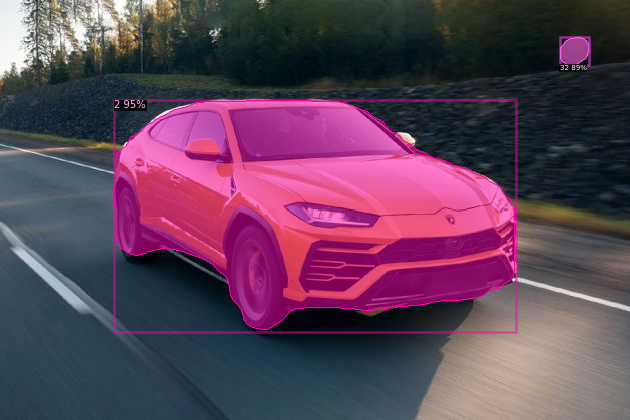

In [ ]:
!wget https://stimg.cardekho.com/images/carexteriorimages/630x420/Lamborghini/Urus/4418/Lamborghini-Urus-V8/1621927166506/front-left-side-47.jpg

"""
Default drawing function (draw_instances) by detectron2 for instance_segmentation.
"""
im = cv2.imread("/content/front-left-side-47.jpg")
outputs = predictor(im)
v = Visualizer(im,
                scale=1, 
                # instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
               instance_mode=ColorMode.SEGMENTATION
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image())

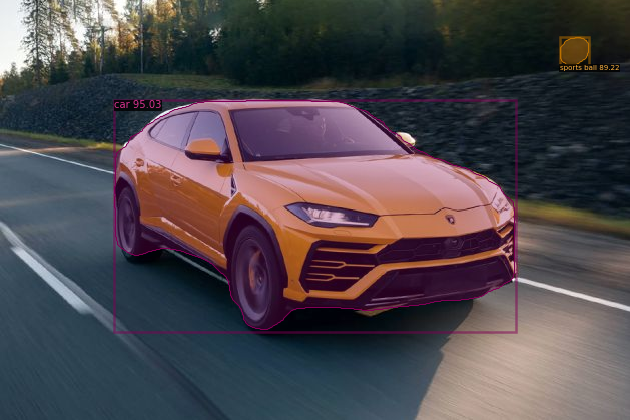

In [ ]:
"""
More customizable output function "overlay_instances"
That's what I used for maintaining constant color across frames and
display tracked ID as well
"""

scores = outputs['instances'].get_fields()['scores'].cpu().numpy()
classes = outputs['instances'].get_fields()['pred_classes'].cpu().numpy()

im = cv2.imread("/content/front-left-side-47.jpg")
v = Visualizer(im)
v = v.overlay_instances(
              masks=outputs['instances'].get_fields()['pred_masks'].cpu().numpy(),
              boxes=outputs['instances'].get_fields()['pred_boxes'].tensor.cpu().numpy(),
              labels=[classes_list[classes[i]] + ' ' + str(((scores[i] * 10000) // 1) / 100) for i in range(len(classes))],
              keypoints=None,
              assigned_colors=None,
              alpha=0.3,
            )

cv2_imshow(v.get_image())

### Custom segment tracking

In [ ]:
""" 
Clone my github repo for using the tracking functions 
"""

!git clone https://github.com/zafarRehan/DeepSortMask.git

Cloning into 'DeepSortMask'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 1), reused 22 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
"""
Track your maskRCNN predicted objects

--video is mandaory (Input video path)
--ouput is mandaory (Output video path)
--log_details is set to 'false' by default (log tracking details or not)
--info_panel is set to true by default ( draw top left corner box with tracking details or not )

"""
%cd /content/DeepSortMask
!python mask_tracker.py --video '/content/DeepSortMask/data/video/cars.mp4' --output '/content/cars_output.avi' --log_details 'false' --info_panel 'true'

/content/DeepSortMask
frame_1
/usr/local/lib/python3.7/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Detected:  ['car', 'car', 'car', 'car', 'car', 'car', 'boat']
FPS: 0.39
frame_2
Detected:  ['car', 'car', 'car', 'car', 'car', 'car', 'boat', 'car', 'car']
FPS: 5.09
frame_3
Detected:  ['car', 'car', 'car', 'car', 'car', 'car', 'boat', 'car', 'car']
FPS: 2.62
frame_4
Detected:  ['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'boat']
FPS: 2.33
frame_5
Detected:  ['car', 'car', 'car', 'car', 'car', 'car', 'car', 'boat', 'car', 'car']
FPS: 2.33
frame_6
Detected:  ['car', 'car', 'car', 'car', 'car', 'car', 'boat', 'car', 'car', 'car']
FPS: 2.29
frame_7
Detected:  ['car', 'car', 'car', 'car', 'car', 'boat', 'car', 'car', 'car']
FPS: 2.32
frame_8
D

In [ ]:
"""
Mount your gdrive and save your output video there as download from colab is too slow
"""
from google.colab import drive
drive.mount('/content/gdrive') 
%cp /content/cars_output.avi /content/gdrive/MyDrive/maskRCNN_track_outputs/cars_output.avi